<a href="https://colab.research.google.com/github/ming-zhao/Business-Analytics/blob/master/notebooks/parking_violation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case: NYC Parking Violation Data

We consider packing violation data in NYC from August 2013 to June 2014. The [dataset](https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2014-August-/jt7v-77mi
) is available in [NYC Open Data](https://opendata.cityofnewyork.us/), which is a collection of 750 New York City public datasets made available by city agencies and organizations.

In [0]:
# load python packages and data
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import IFrame

dataurl = 'https://raw.githubusercontent.com/ming-zhao/Business-Analytics/master/data/data_management/'
df_park = pd.read_csv(dataurl+'Parking_Violations.csv', parse_dates=['Time'])

# run pivot table
df_pivot = df_park[(df_park['Street Code1']!=0) &\
                   (df_park['Street Code2']!=0) &\
                   (df_park['Street Code2']!=0)].pivot_table(values='Summons Number',
                                                  index='Address',
                                                  margins=False,
                                                  aggfunc='count').sort_values(by='Summons Number',
                                                                               ascending=False).head(10)
df_pivot['ticket'] = df_pivot['Summons Number']
df_pivot['fine'] = df_pivot['ticket']*115
df_pivot = df_pivot.drop(['Summons Number'], axis=1)

Show the first 5 rows of the dataset

In [0]:
df_park.head()

,Summons Number,Registration State,Issue Date,Vehicle Body Type,Street Code1,Street Code2,Street Code3,Vehicle Make,Violation Time,Violation County,Vehicle Color,Vehicle Year,Time,Address
0,1356906515,NY,9/18/1971,SDN,13610,37270,37290,MAZDA,0914P,NY,BLK,2010,9:14 PM,4165 BROADWAY
1,1365454538,NY,2/12/1976,VAN,37290,10740,10940,TOYOT,0458A,Q,BLK,2007,4:58 AM,49-11 BROADWAY
2,1355329360,NY,12/9/1990,SUBN,35290,31240,31290,FORD,0902A,Q,BK,2003,9:02 AM,4402 BEACH CHANNEL DR
3,1364794688,NY,1/12/1991,SUBN,27106,9340,9540,ME/BE,0223P,Q,SILVE,2005,2:23 PM,40-30 235 ST
4,1357592103,NY,1/4/2000,SDN,0,40404,40404,NISSA,1045P,R,SILVE,2008,10:45 PM,140 LUDWIGE LANE


The top 10 hydrants that collect most of the tickets. Note that the fine for hydrant parking violation is $115. So the column 'fine' is the revenue generated by each hydrant and the total fine of the top 10 hydrants is &dollar;144,440.


In [0]:
print('Total annual revenue of top 10 hydrants', df_pivot.fine.sum())
df_pivot

Total annual revenue of top 10 hydrants 144440


,ticket,fine
Address,,
152 Forsyth St,179,20585
104 Forsyth St,137,15755
100 Overlook Ter,135,15525
720 Lenox Ave,127,14605
122 Montague St,126,14490
21 W 58th St,125,14375
2960 Fredrick Douglas Blv,119,13685
44 Court St,114,13110
1498 3rd Ave,99,11385


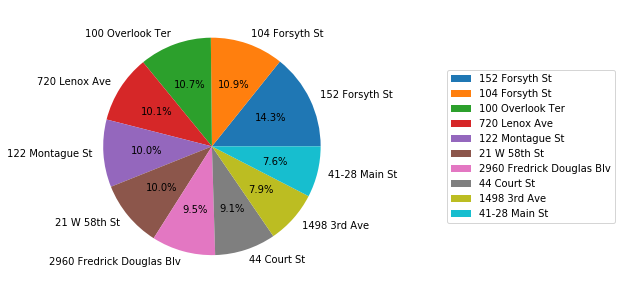

In [0]:
axes = df_pivot.plot.pie(y='ticket', autopct='%1.1f%%', figsize=(5, 5))
axes.legend(loc='best', bbox_to_anchor=(2,.8))
axes.set_ylabel('')
plt.show()

The most "valuable" hydrant is shown in [google street view](https://www.google.com/maps/@40.7206121,-73.9917312,3a,75y,288.92h,55.77t/data=!3m6!1e1!3m4!1s_SBRnIVor2FDGiszffialA!2e0!7i13312!8i6656
)

In [0]:
IFrame('https://www.google.com/maps/embed?pb=!4v1557893815788!6m8!1m7!1s_SBRnIVor2FDGiszffialA!2m2!1d40.72061441911959!2d-73.99172978854598!3f288.92!4f0!5f0.7820865974627469', width=700, height=400)

However, according to NYC department of transportation (DOT), this may not be considered as a parking violation. ![hydrant](https://github.com/ming-zhao/Business-Analytics/raw/master/images/hydrant.png)

The issue is first spotted by Ben Wellington who is the author of blog [I Quant NY](https://iquantny.tumblr.com/). It certainly has impacts on NYC DOT. Today, the google street map shows

In [0]:
IFrame('https://www.google.com/maps/embed?pb=!4v1557932957501!6m8!1m7!1s04LptdatMEwvnW3J_tjGvw!2m2!1d40.72061130331954!2d-73.99171284164994!3f264.0115330665066!4f-27.9676492146982!5f0.7820865974627469', width=700, height=400)